## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_alunos = pd.read_csv('../pandas_test/dataset/alunos.csv')

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [7]:
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [12]:
df_alunos.head(2)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False


In [13]:
df_alunos.shape

(18, 4)

In [19]:
df_alunos.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [ ]:
dados= pd.read_csv('../pandas_test/dataset/alunos.csv')

1) Podemos começar verificando a existência de dados nulos:

In [ ]:
dados.isnull().sum()

E com o resultado, vamos notar que apenas a coluna "Notas" possui dados nulos. Nesse caso, podemos pensar que os alunos que estão sem nota muito provavelmente estavam com 0. Sendo assim, podemos substituir os valores nulos por 0:

In [ ]:
dados = dados.fillna(0)
dados

2) Para removermos os alunos "Alice" e "Carlos" da nossa base de dados, precisamos pegar os índices das linhas onde os nomes deles estão localizados e utilizar o método drop para remover as respectivas linhas:

In [ ]:
# salvando os índices das linhas a serem removidas em uma variável
alunos_a_remover = dados.query('Nome == "Alice" | Nome == "Carlos"').index

In [ ]:
# removendo as linhas referentes aos alunos "Alice" e "Carlos"
dados.drop(alunos_a_remover, axis=0, inplace=True)

3) Nesse caso, nosso primeiro passo é criar uma variável onde nós realizamos a seleção apenas dos alunos aprovados:

In [ ]:
selecao = dados['Aprovado'] == True

Feito isso, podemos passar essa seleção para nosso DataFrame:

In [ ]:
dados[selecao]

4) Para salvarmos o DataFrame apenas com os alunos aprovados, nós podemos começar salvando o DataFrame resultante do desafio 3 em uma variável:

In [ ]:
alunos_aprovados = dados[selecao]

Em seguida, podemos utilizar o método to_csv para salvá-lo no formato csv:

In [ ]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)

Extra: O método replace é utilizado para substituir um determinado valor por outro. No caso da nossa base de dados, nós queremos substituir os valores 7.0 por 8.0. Para isso, nós podemos utilizar o seguinte trecho de código:

In [ ]:
alunos_aprovados.replace(7.0, 8.0)

E para salvarmos essa alteração de forma definitiva, podemos atribuí-la a nossa variável:

In [ ]:
alunos_aprovados = alunos_aprovados.replace(7.0, 8.0)
alunos_aprovados

### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [ ]:
import pandas as pd

In [20]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [21]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                      
# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [22]:
media_quartos = df['Quartos'].mean()
media_quartos

np.float64(2.481568707761622)

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [23]:
df['Bairro'].nunique()

149

In [24]:
df.Bairro.nunique()

149

In [26]:
df.groupby('Bairro')['Quartos'].mean().sort_values(ascending=False).head(10)

Bairro
Jardim Oceânico      3.739130
Península            3.250000
São Conrado          3.030043
Cavalcanti           3.000000
Alto da Boa Vista    3.000000
Cidade Jardim        3.000000
Joá                  3.000000
Urca                 2.946429
Lagoa                2.868583
Leblon               2.852538
Name: Quartos, dtype: float64

In [27]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [25]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,19532.000000,19532.000000,19532.000000,19532.000000,1.952500e+04,1.878700e+04,14060.000000
mean,2.481569,1.232388,0.875998,119.790498,4.744615e+03,1.722654e+03,686.170413
std,0.961188,14.048294,0.981047,92.615178,3.425842e+04,4.797463e+04,4505.787049
min,0.000000,0.000000,0.000000,10.000000,1.000000e+02,1.000000e+00,1.000000
25%,2.000000,0.000000,0.000000,66.000000,1.600000e+03,6.000000e+02,100.000000
50%,2.000000,1.000000,1.000000,90.000000,2.700000e+03,9.760000e+02,219.000000
75%,3.000000,2.000000,1.000000,140.000000,5.000000e+03,1.621000e+03,500.000000
max,32.000000,1960.000000,7.000000,1200.000000,4.500000e+06,6.552570e+06,450625.000000


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [29]:
df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(10)

Bairro
Joá                15500.000000
Arpoador           12429.769231
Cidade Jardim      12000.000000
Ipanema             9487.205317
Botafogo            9369.207116
Leblon              8637.761483
Lagoa               8063.804928
São Conrado         7859.871245
Jardim Oceânico     7626.086957
Península           7285.000000
Name: Valor, dtype: float64

### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

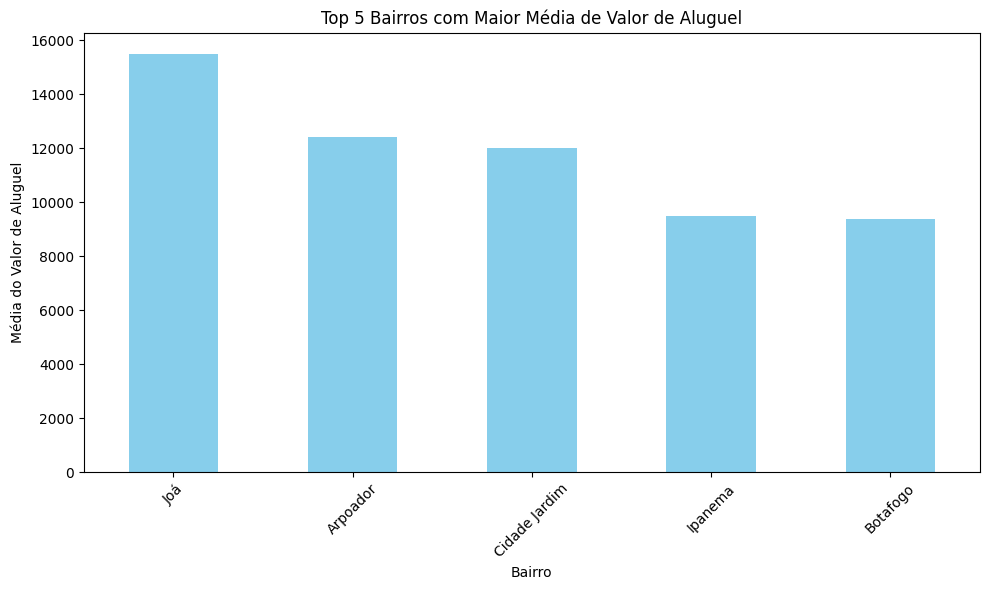

In [31]:
import matplotlib.pyplot as plt

top5_bairros = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(5)
top5_bairros.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.ylabel('Média do Valor de Aluguel')
plt.title('Top 5 Bairros com Maior Média de Valor de Aluguel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

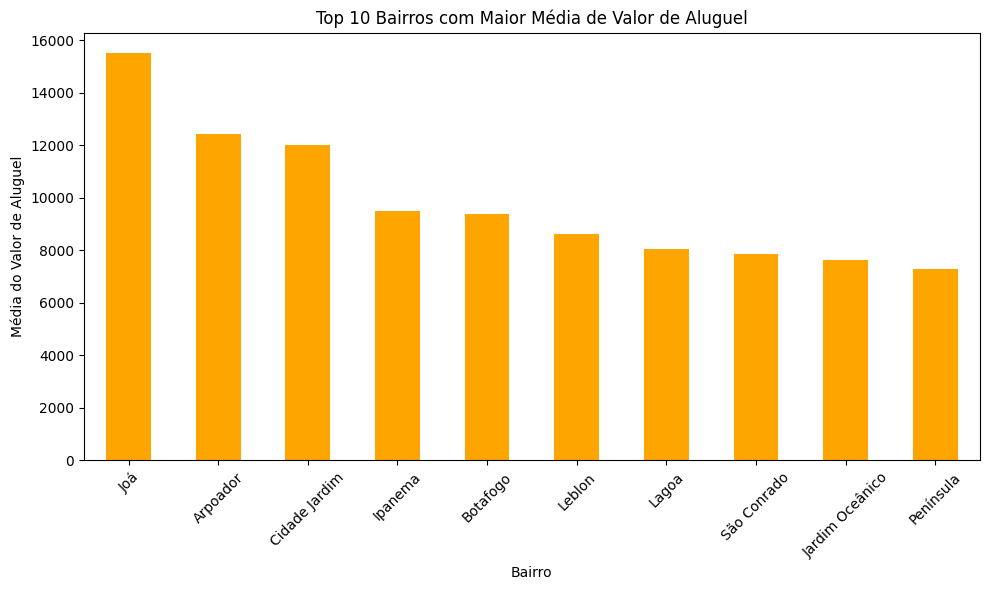

In [34]:
top10_bairros = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(10)
top10_bairros.plot(kind='bar', figsize=(10,6), color='orange')
plt.ylabel('Média do Valor de Aluguel')
plt.title('Top 10 Bairros com Maior Média de Valor de Aluguel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

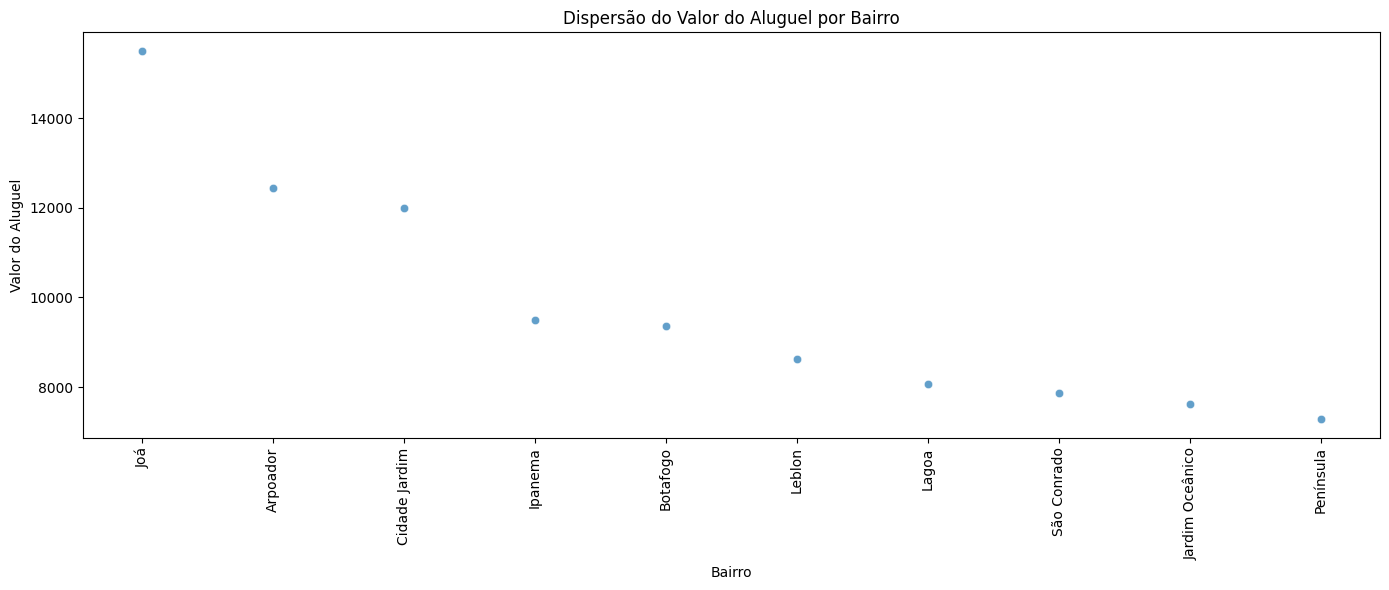

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt
top10_bairros = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.scatterplot(x=top10_bairros.index, y=top10_bairros.values, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Dispersão do Valor do Aluguel por Bairro')
plt.ylabel('Valor do Aluguel')
plt.xlabel('Bairro')
plt.tight_layout()
plt.show()

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras